In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-15 16:11:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.005s  

2023-06-15 16:11:31 (33.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

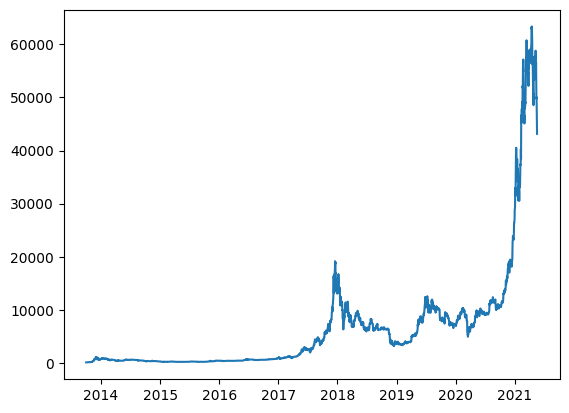

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Closing Price (USD)'])

In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {"Closing Price (USD)": 'Prices'})
bitcoin_prices

,Prices
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


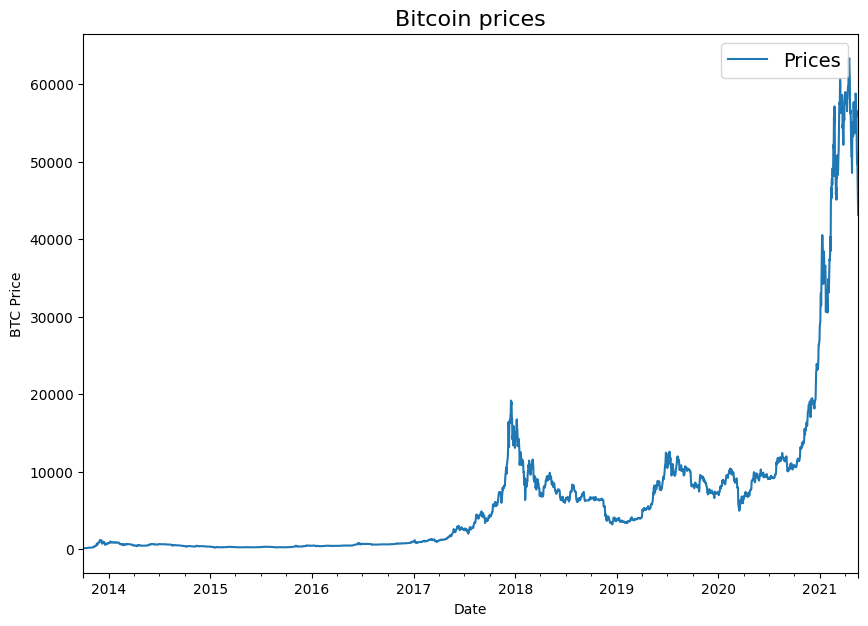

In [ ]:
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel('BTC Price')
plt.title('Bitcoin prices', fontsize = 16)
plt.legend(fontsize = 14);

In [ ]:
from pandas._libs.tslibs import timestamps
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as f:
  csv_reader = csv.reader(f, delimiter = ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))


timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Prices"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:

# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

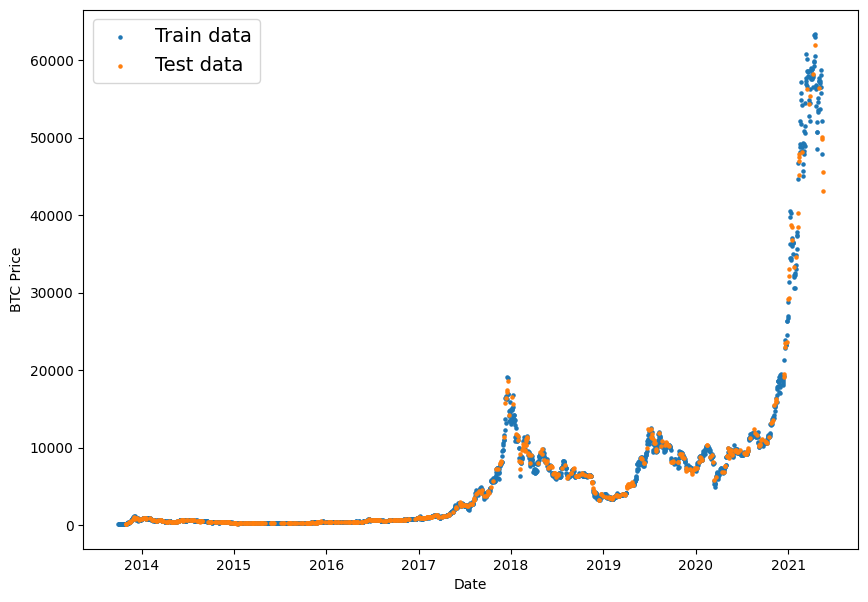

In [ ]:

# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

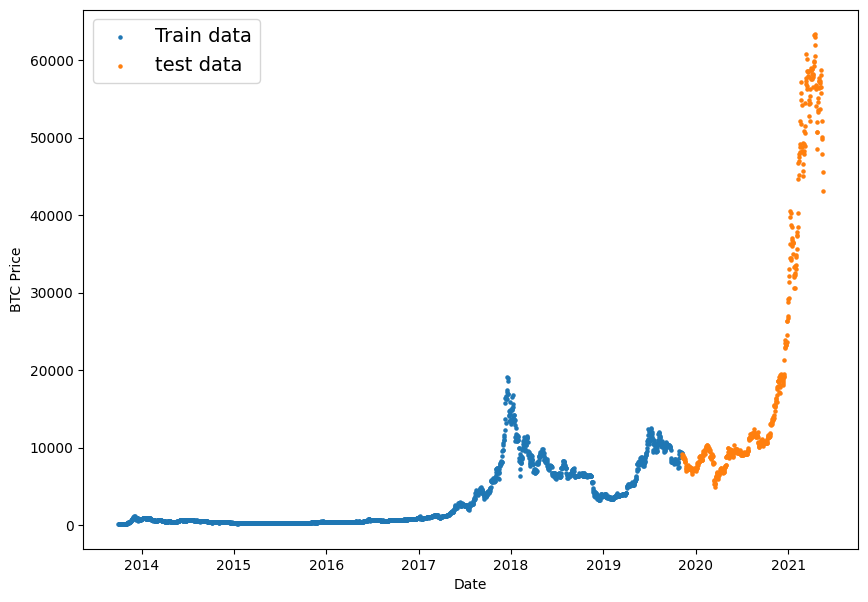

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = 'Train data')
plt.scatter(X_test, y_test, s = 5, label = 'test data')
plt.xlabel("Date")
plt.ylabel('BTC Price')
plt.legend(fontsize = 14)
plt.show();

In [ ]:
def plot_time_series(timesteps, values, format = '.', start = 0, end = None, label = None):
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

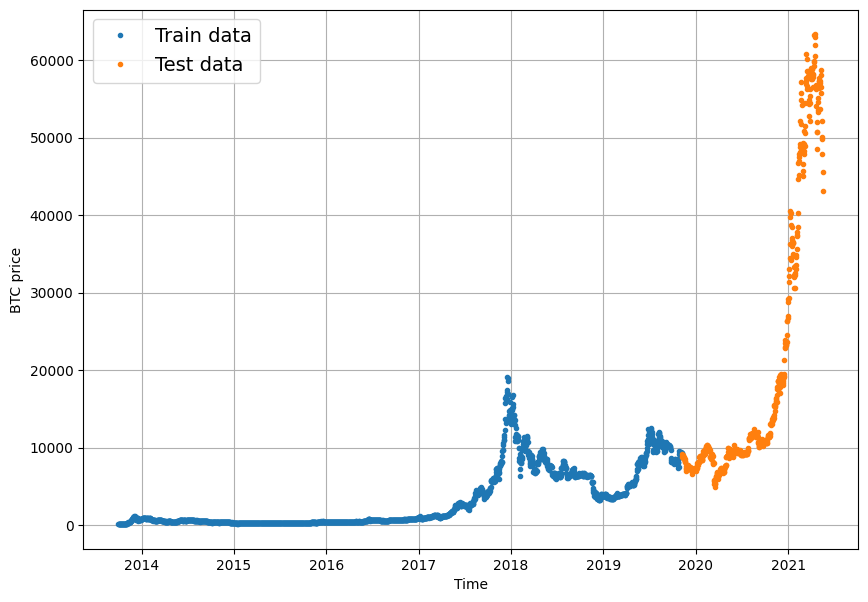

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series(timesteps = X_test, values = y_test, label = 'Test data')

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast

array([ 9226.48582088,  8794.35864452,  8798.04205463,  9081.18687849,
        8711.53433917,  8760.89271814,  8749.52059102,  8656.97092235,
        8500.64355816,  8469.2608989 ,  8537.33965197,  8205.80636599,
        8118.4885358 ,  8074.84317361,  7612.7405735 ,  7262.11053495,
        7303.40575852,  7041.73293642,  7211.86180875,  7141.06944869,
        7523.4806726 ,  7390.20746923,  7729.26593894,  7542.23560864,
        7381.96300782,  7333.43293049,  7315.36776456,  7213.73376172,
        7398.78704961,  7511.88058312,  7532.12351309,  7550.23919987,
        7333.09604316,  7239.76257544,  7198.06667705,  7190.27236926,
        7238.87432299,  7087.02498535,  7112.73147612,  6883.49639377,
        6584.02884335,  7424.01540023,  7147.56832379,  7139.93337053,
        7286.33508116,  7236.98620461,  7166.17237853,  7235.6266505 ,
        7212.80939522,  7183.70653603,  7227.29371168,  7311.56064392,
        7385.46484791,  7251.27679432,  7179.95781929,  7174.74401195,
      

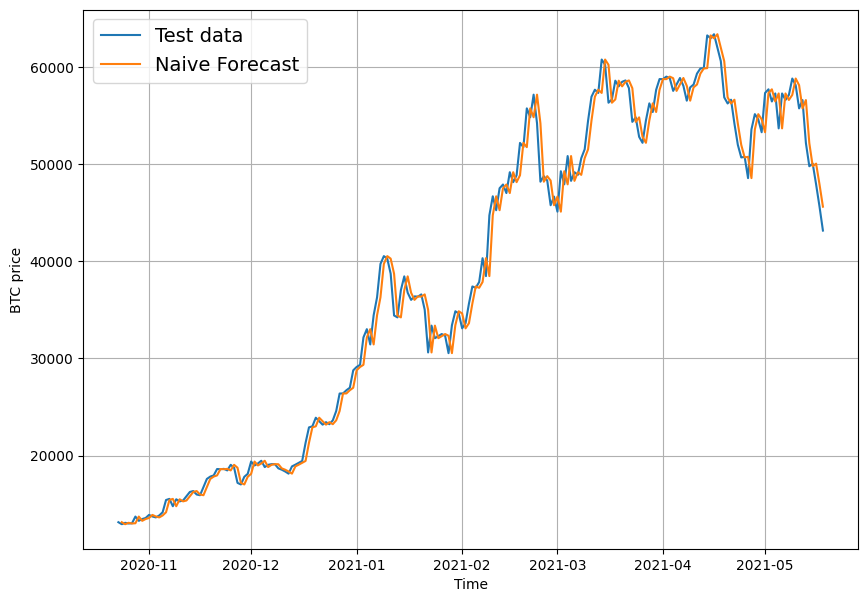

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

In [ ]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [ ]:
tf.reduce_max(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon = HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
import numpy as np

def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T
  # print(window_indexes)
  windowed_array = x[window_indexes]

  # print(windowed_array)
  windows, labels = get_labelled_windows(windowed_array)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


In [ ]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1 - test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear')
], name = 'model_1_dense')


model_1.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae', 'mse']
)



history_1 = model_1.fit(x = train_windows,
                        y = train_labels,
                        epochs = 100,
                        verbose = 1,
                        batch_size = 128,
                        validation_data = (test_windows, test_labels),
                        callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2286.8850 - mae: 2286.8850 - mse: 14485951.0000

18/18 [==============================] - 8s 100ms/step - loss: 2286.8850 - mae: 2286.8850 - mse: 14485951.0000 - val_loss: 4057.5469 - val_mae: 4057.5469 - val_mse: 31889570.0000
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 384.7176 - mae: 384.7176 - mse: 555846.9375

18/18 [==============================] - 1s 59ms/step - loss: 376.0929 - mae: 376.0929 - mse: 521929.7188 - val_loss: 1132.5590 - val_mae: 1132.5590 - val_mse: 4257574.5000
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 231.4192 - mae: 231.4192 - mse: 252456.0938 - val_loss: 1155.7037 - val_mae: 1155.7037 - val_mse: 4411436.0000
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 222.3662 - mae: 222.3662 - mse: 253524.0625

18/18 [==============================] - 1s 62ms/step - loss: 207.5831 - mae: 207.5831 - mse: 218330.2969 - val_loss: 1118.4869 - val_mae: 1118.4869 - val_mse: 4167591.2500
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 204.9459 - mae: 204.9459 - mse: 215031.0156

18/18 [==============================] - 1s 58ms/step - loss: 199.0979 - mae: 199.0979 - mse: 202886.0000 - val_loss: 1087.2643 - val_mae: 1087.2643 - val_mse: 3932921.5000
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 197.3552 - mae: 197.3552 - mse: 199522.6406 - val_loss: 1100.8441 - val_mae: 1100.8441 - val_mse: 3997325.0000
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 211.7080 - mae: 211.7080 - mse: 232329.4688

18/18 [==============================] - 1s 53ms/step - loss: 193.8551 - mae: 193.8551 - mse: 194362.8125 - val_loss: 1033.4275 - val_mae: 1033.4275 - val_mse: 3579838.5000
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 185.0863 - mae: 185.0863 - mse: 179124.0625 - val_loss: 1045.9784 - val_mae: 1045.9784 - val_mse: 3493671.2500
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 183.0955 - mae: 183.0955 - mse: 177850.0312

18/18 [==============================] - 1s 54ms/step - loss: 180.3049 - mae: 180.3049 - mse: 172029.8125 - val_loss: 1020.0704 - val_mae: 1020.0704 - val_mse: 3333531.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 177.4072 - mae: 177.4072 - mse: 166480.8906

18/18 [==============================] - 1s 72ms/step - loss: 177.4072 - mae: 177.4072 - mse: 166480.8906 - val_loss: 978.3189 - val_mae: 978.3189 - val_mse: 3138638.0000
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 172.7010 - mae: 172.7010 - mse: 159023.0938

18/18 [==============================] - 2s 128ms/step - loss: 172.3903 - mae: 172.3903 - mse: 157561.5469 - val_loss: 949.3532 - val_mae: 949.3531 - val_mse: 2985939.0000
Epoch 12/100
18/18 [==============================] - 0s 13ms/step - loss: 169.3036 - mae: 169.3036 - mse: 151153.3594 - val_loss: 1010.0684 - val_mae: 1010.0684 - val_mse: 3058854.2500
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 158.7685 - mae: 158.7685 - mse: 136619.6719

18/18 [==============================] - 2s 137ms/step - loss: 165.6343 - mae: 165.6343 - mse: 146402.2656 - val_loss: 916.6656 - val_mae: 916.6656 - val_mse: 2719892.2500
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 160.0683 - mae: 160.0683 - mse: 138069.7500

18/18 [==============================] - 1s 68ms/step - loss: 160.0683 - mae: 160.0683 - mse: 138069.7500 - val_loss: 893.0923 - val_mae: 893.0923 - val_mse: 2581911.5000
Epoch 15/100
18/18 [==============================] - 0s 12ms/step - loss: 162.0657 - mae: 162.0657 - mse: 139039.8438 - val_loss: 925.2835 - val_mae: 925.2835 - val_mse: 2588296.7500
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 150.5309 - mae: 150.5309 - mse: 116321.9688

18/18 [==============================] - 1s 54ms/step - loss: 152.2542 - mae: 152.2542 - mse: 126084.3047 - val_loss: 849.1290 - val_mae: 849.1290 - val_mse: 2328339.5000
Epoch 17/100
18/18 [==============================] - 0s 13ms/step - loss: 147.8787 - mae: 147.8787 - mse: 119869.2812 - val_loss: 851.4920 - val_mae: 851.4920 - val_mse: 2258025.5000
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 144.0766 - mae: 144.0766 - mse: 114340.9609 - val_loss: 888.0629 - val_mae: 888.0629 - val_mse: 2313796.2500
Epoch 19/100
14/18 [======================>.......] - ETA: 0s - loss: 143.0152 - mae: 143.0152 - mse: 115250.9531

18/18 [==============================] - 1s 53ms/step - loss: 139.8771 - mae: 139.8771 - mse: 108661.9844 - val_loss: 838.0155 - val_mae: 838.0155 - val_mse: 2119390.0000
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 141.3030 - mae: 141.3030 - mse: 110389.8672

18/18 [==============================] - 1s 46ms/step - loss: 141.3030 - mae: 141.3030 - mse: 110389.8672 - val_loss: 779.1981 - val_mae: 779.1981 - val_mse: 2021785.1250
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 135.2221 - mae: 135.2221 - mse: 98426.7734 

18/18 [==============================] - 1s 31ms/step - loss: 136.4004 - mae: 136.4004 - mse: 104057.3203 - val_loss: 733.3589 - val_mae: 733.3589 - val_mse: 1807013.2500
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 172.0273 - mae: 172.0273 - mse: 185471.6562

18/18 [==============================] - 1s 30ms/step - loss: 133.2677 - mae: 133.2677 - mse: 99834.2188 - val_loss: 717.7510 - val_mae: 717.7510 - val_mse: 1735899.3750
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 147.7297 - mae: 147.7297 - mse: 97298.8359

18/18 [==============================] - 1s 30ms/step - loss: 128.5272 - mae: 128.5272 - mse: 94055.2266 - val_loss: 702.7067 - val_mae: 702.7067 - val_mse: 1658837.1250
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 141.4220 - mae: 141.4220 - mse: 92926.0469

18/18 [==============================] - 1s 30ms/step - loss: 130.2265 - mae: 130.2265 - mse: 94565.4531 - val_loss: 690.8560 - val_mae: 690.8560 - val_mse: 1613545.6250
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 134.6014 - mae: 134.6014 - mse: 94831.1328 - val_loss: 692.0620 - val_mae: 692.0620 - val_mse: 1568442.3750
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 124.6475 - mae: 124.6475 - mse: 87295.9062 - val_loss: 693.9530 - val_mae: 693.9530 - val_mse: 1616571.8750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 184.5335 - mae: 184.5335 - mse: 167754.7031

18/18 [==============================] - 1s 30ms/step - loss: 122.6033 - mae: 122.6033 - mse: 87554.1719 - val_loss: 658.8135 - val_mae: 658.8135 - val_mse: 1478393.7500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 117.4150 - mae: 117.4150 - mse: 76133.4531

18/18 [==============================] - 1s 31ms/step - loss: 120.3323 - mae: 120.3323 - mse: 82778.5703 - val_loss: 650.2400 - val_mae: 650.2400 - val_mse: 1440175.0000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1386 - mae: 121.1386 - mse: 84750.1172 - val_loss: 676.6008 - val_mae: 676.6008 - val_mse: 1472077.0000
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 121.4030 - mae: 121.4030 - mse: 82504.5234 - val_loss: 713.3229 - val_mae: 713.3229 - val_mse: 1554962.0000
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7138 - mae: 127.7138 - mse: 86805.0469 - val_loss: 851.2731 - val_mae: 851.2731 - val_mse: 1976923.8750
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0997 - mae: 127.0997 - mse: 85252.5781 - val_loss: 687.8863 - val_mae: 687.8863 - val_mse: 1479509.8750
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6065 - mae: 119.6065 - m

18/18 [==============================] - 1s 31ms/step - loss: 117.9472 - mae: 117.9472 - mse: 80750.7266 - val_loss: 648.7485 - val_mae: 648.7485 - val_mse: 1378596.0000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 100.3593 - mae: 100.3593 - mse: 45388.3125

18/18 [==============================] - 1s 30ms/step - loss: 116.3897 - mae: 116.3897 - mse: 79621.8125 - val_loss: 625.9165 - val_mae: 625.9165 - val_mse: 1326603.3750
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4105 - mae: 125.4105 - mse: 82524.5938 - val_loss: 713.4542 - val_mae: 713.4542 - val_mse: 1534053.2500
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 154.3077 - mae: 154.3077 - mse: 128818.5469

18/18 [==============================] - 1s 30ms/step - loss: 117.3902 - mae: 117.3902 - mse: 78315.6719 - val_loss: 620.5947 - val_mae: 620.5947 - val_mse: 1308065.8750
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 113.6325 - mae: 113.6325 - mse: 76966.0781

18/18 [==============================] - 1s 34ms/step - loss: 113.4492 - mae: 113.4492 - mse: 76785.7109 - val_loss: 609.1822 - val_mae: 609.1822 - val_mse: 1298739.3750
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 114.5853 - mae: 114.5853 - mse: 76483.8594 - val_loss: 668.8311 - val_mae: 668.8311 - val_mse: 1457429.1250
Epoch 40/100
13/18 [====================>.........] - ETA: 0s - loss: 114.0281 - mae: 114.0281 - mse: 80816.6406

18/18 [==============================] - 1s 60ms/step - loss: 112.7509 - mae: 112.7509 - mse: 76731.2344 - val_loss: 599.7545 - val_mae: 599.7545 - val_mse: 1260792.8750
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1429 - mae: 113.1429 - mse: 76419.4062 - val_loss: 629.9856 - val_mae: 629.9856 - val_mse: 1349675.7500
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 114.5112 - mae: 114.5112 - mse: 74238.3516

18/18 [==============================] - 1s 42ms/step - loss: 116.9328 - mae: 116.9328 - mse: 78753.4062 - val_loss: 594.0546 - val_mae: 594.0546 - val_mse: 1249680.7500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5803 - mae: 110.5803 - mse: 73460.1250 - val_loss: 608.9139 - val_mae: 608.9139 - val_mse: 1291072.5000
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2681 - mae: 113.2681 - mse: 75051.4844 - val_loss: 652.8835 - val_mae: 652.8835 - val_mse: 1405428.7500
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0318 - mae: 112.0318 - mse: 75223.6250 - val_loss: 601.1154 - val_mae: 601.1154 - val_mse: 1249592.8750
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 83.7652 - mae: 83.7652 - mse: 46372.6055

18/18 [==============================] - 1s 31ms/step - loss: 111.3249 - mae: 111.3249 - mse: 74883.0703 - val_loss: 592.7697 - val_mae: 592.7697 - val_mse: 1243941.2500
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5881 - mae: 109.5881 - mse: 73775.9531 - val_loss: 650.4044 - val_mae: 650.4044 - val_mse: 1349136.7500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8206 - mae: 110.8206 - mse: 73278.7578 - val_loss: 619.9029 - val_mae: 619.9029 - val_mse: 1279195.2500
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 117.8095 - mae: 117.8095 - mse: 75961.7031 

18/18 [==============================] - 1s 33ms/step - loss: 117.8095 - mae: 117.8095 - mse: 75961.7031 - val_loss: 585.9741 - val_mae: 585.9741 - val_mse: 1222828.1250
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3002 - mae: 109.3002 - mse: 73239.2109 - val_loss: 638.8144 - val_mae: 638.8144 - val_mse: 1358594.1250
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9578 - mae: 110.9578 - mse: 73939.0234 - val_loss: 627.4186 - val_mae: 627.4186 - val_mse: 1294564.3750
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 115.8459 - mae: 115.8459 - mse: 77260.4062

18/18 [==============================] - 1s 30ms/step - loss: 115.8459 - mae: 115.8459 - mse: 77260.4062 - val_loss: 583.3166 - val_mae: 583.3166 - val_mse: 1215973.6250
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 63.0498 - mae: 63.0498 - mse: 23935.4844

18/18 [==============================] - 1s 30ms/step - loss: 114.0783 - mae: 114.0783 - mse: 75636.0391 - val_loss: 582.4885 - val_mae: 582.4885 - val_mse: 1205335.5000
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9090 - mae: 112.9090 - mse: 74807.8203 - val_loss: 654.0463 - val_mae: 654.0463 - val_mse: 1349806.0000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1972 - mae: 113.1972 - mse: 74394.2656 - val_loss: 599.2511 - val_mae: 599.2511 - val_mse: 1255413.0000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5724 - mae: 113.5724 - mse: 75146.0000 - val_loss: 804.2023 - val_mae: 804.2023 - val_mse: 1865198.3750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 129.7348 - mae: 129.7348 - mse: 87791.8203 - val_loss: 649.5995 - val_mae: 649.5995 - val_mse: 1375228.3750
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2430 - mae: 116.2430 - m

18/18 [==============================] - 1s 29ms/step - loss: 108.9069 - mae: 108.9069 - mse: 71056.0156 - val_loss: 577.9102 - val_mae: 577.9102 - val_mse: 1190278.3750
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8448 - mae: 109.8448 - mse: 72174.9453 - val_loss: 610.4827 - val_mae: 610.4827 - val_mse: 1248203.7500
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5961 - mae: 111.5961 - mse: 73150.7734 - val_loss: 649.0831 - val_mae: 649.0831 - val_mse: 1335910.2500
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 111.6881 - mae: 111.6881 - mse: 73980.7812 

18/18 [==============================] - 1s 31ms/step - loss: 111.6881 - mae: 111.6881 - mse: 73980.7812 - val_loss: 574.5099 - val_mae: 574.5099 - val_mse: 1184562.8750
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0403 - mae: 110.0403 - mse: 71374.3906 - val_loss: 589.6898 - val_mae: 589.6898 - val_mse: 1227006.8750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4445 - mae: 107.4445 - mse: 70169.6953 - val_loss: 613.6368 - val_mae: 613.6368 - val_mse: 1280927.2500
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5183 - mae: 112.5183 - mse: 71143.4766 - val_loss: 665.2045 - val_mae: 665.2045 - val_mse: 1411227.3750
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8680 - mae: 123.8680 - mse: 80737.1094 - val_loss: 678.6796 - val_mae: 678.6796 - val_mse: 1448244.5000
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 120.9261 - mae: 120.9261 - m

18/18 [==============================] - 1s 32ms/step - loss: 108.7904 - mae: 108.7904 - mse: 71430.5469 - val_loss: 572.4051 - val_mae: 572.4051 - val_mse: 1181255.8750
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2787 - mae: 110.2787 - mse: 72176.1094 - val_loss: 619.1050 - val_mae: 619.1050 - val_mse: 1290622.5000
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 168.8060 - mae: 168.8060 - mse: 175742.5469

18/18 [==============================] - 1s 31ms/step - loss: 107.0035 - mae: 107.0035 - mse: 70969.6562 - val_loss: 571.1198 - val_mae: 571.1198 - val_mse: 1174705.0000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1505 - mae: 108.1505 - mse: 70358.8516 - val_loss: 614.6639 - val_mae: 614.6639 - val_mse: 1252339.6250
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 81.4048 - mae: 81.4048 - mse: 26425.0254

18/18 [==============================] - 0s 29ms/step - loss: 111.2473 - mae: 111.2473 - mse: 72974.8047 - val_loss: 569.9998 - val_mae: 569.9998 - val_mse: 1175682.3750
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7396 - mae: 108.7396 - mse: 70441.8203 - val_loss: 571.1187 - val_mae: 571.1187 - val_mse: 1179710.8750
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 104.6349 - mae: 104.6349 - mse: 48106.7656

18/18 [==============================] - 1s 30ms/step - loss: 108.6539 - mae: 108.6539 - mse: 70614.3594 - val_loss: 569.4316 - val_mae: 569.4316 - val_mse: 1173750.1250
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4146 - mae: 109.4146 - mse: 73047.3750 - val_loss: 621.6934 - val_mae: 621.6934 - val_mse: 1291084.2500
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2450 - mae: 109.2450 - mse: 72012.0469 - val_loss: 569.7718 - val_mae: 569.7718 - val_mse: 1169829.5000
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7724 - mae: 106.7724 - mse: 70230.0469 - val_loss: 583.0079 - val_mae: 583.0079 - val_mse: 1205997.1250
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 193.5185 - mae: 193.5185 - mse: 231017.8750

18/18 [==============================] - 1s 30ms/step - loss: 113.6705 - mae: 113.6705 - mse: 75110.8359 - val_loss: 569.3889 - val_mae: 569.3889 - val_mse: 1174590.5000
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7957 - mae: 109.7957 - mse: 71645.9609 - val_loss: 628.7044 - val_mae: 628.7044 - val_mse: 1306556.8750
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9032 - mae: 109.9032 - mse: 71299.5469 - val_loss: 572.8333 - val_mae: 572.8333 - val_mse: 1182358.5000
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8626 - mae: 106.8626 - mse: 70644.3281 - val_loss: 572.7725 - val_mae: 572.7725 - val_mse: 1169472.5000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5775 - mae: 108.5775 - mse: 70076.8281 - val_loss: 605.6410 - val_mae: 605.6410 - val_mse: 1228524.0000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8230 - mae: 106.8230 - m

18/18 [==============================] - 1s 36ms/step - loss: 108.4128 - mae: 108.4128 - mse: 71569.3203 - val_loss: 567.3256 - val_mae: 567.3256 - val_mse: 1167946.6250
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3764 - mae: 112.3764 - mse: 73300.9375 - val_loss: 587.8158 - val_mae: 587.8158 - val_mse: 1217237.1250
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 109.5168 - mae: 109.5168 - mse: 72036.8359 - val_loss: 588.6179 - val_mae: 588.6179 - val_mse: 1198220.3750
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 106.7584 - mae: 106.7584 - mse: 72867.6953 

18/18 [==============================] - 1s 42ms/step - loss: 106.0508 - mae: 106.0508 - mse: 68404.6172 - val_loss: 566.5798 - val_mae: 566.5798 - val_mse: 1166592.8750
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 107.2402 - mae: 107.2402 - mse: 69521.7109 - val_loss: 594.5096 - val_mae: 594.5096 - val_mse: 1230118.7500
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 107.4119 - mae: 107.4119 - mse: 70647.9531 - val_loss: 585.6595 - val_mae: 585.6595 - val_mse: 1187745.2500
Epoch 98/100
18/18 [==============================] - 0s 8ms/step - loss: 107.6366 - mae: 107.6366 - mse: 70536.8906 - val_loss: 578.4904 - val_mae: 578.4904 - val_mse: 1193554.1250
Epoch 99/100
11/18 [=================>............] - ETA: 0s - loss: 103.3491 - mae: 103.3491 - mse: 60873.6875 

18/18 [==============================] - 1s 53ms/step - loss: 107.3662 - mae: 107.3662 - mse: 70528.5938 - val_loss: 564.6182 - val_mae: 564.6182 - val_mse: 1157358.2500
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9625 - mae: 117.9625 - mse: 73407.4141 - val_loss: 612.0510 - val_mae: 612.0510 - val_mse: 1244397.8750


In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 612.0510 - mae: 612.0510 - mse: 1244398.3750


[612.051025390625, 612.051025390625, 1244398.375]

In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1_dense')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.6183 - mae: 564.6183 - mse: 1157358.8750


[564.6183471679688, 564.6183471679688, 1157358.875]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8859.48  , 8780.4795, 9020.82  , 8775.043 , 8757.919 , 8738.554 ,
        8679.11  , 8513.559 , 8472.568 , 8519.556 ], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

model_1_results

{'mae': 564.6184,
 'mse': 1157359.0,
 'rmse': 1075.8063,
 'mape': 2.5261388,
 'mase': 0.99187815}

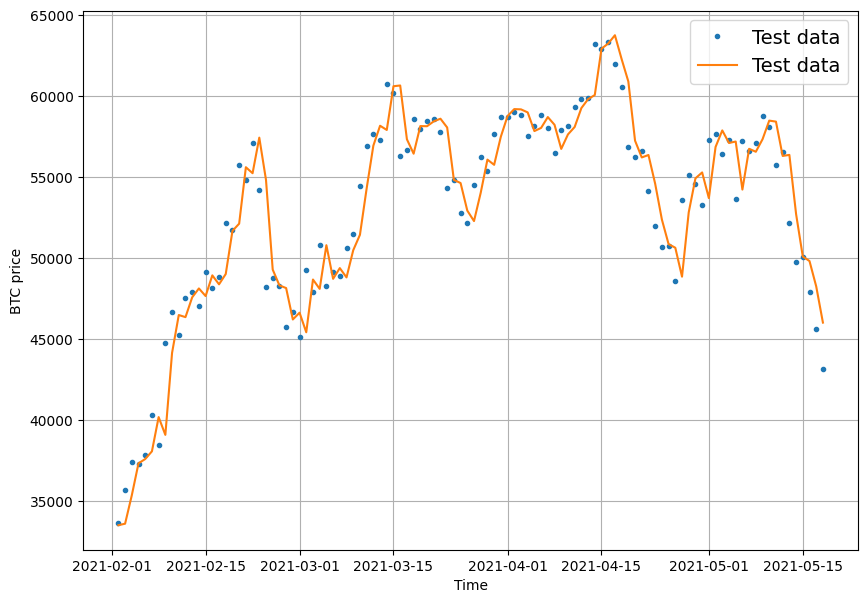

In [ ]:
offset = 450
plt.figure(figsize  = (10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = 'Test data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 label = 'Test data',
                 format = '-')

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_2_dense')

model_2.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)

model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 644.0172


644.0172119140625

In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 602.2713


602.2713012695312

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)

model_2_results

{'mae': 602.2713,
 'mse': 1254132.6,
 'rmse': 1119.8806,
 'mape': 2.739408,
 'mase': 1.0527761}

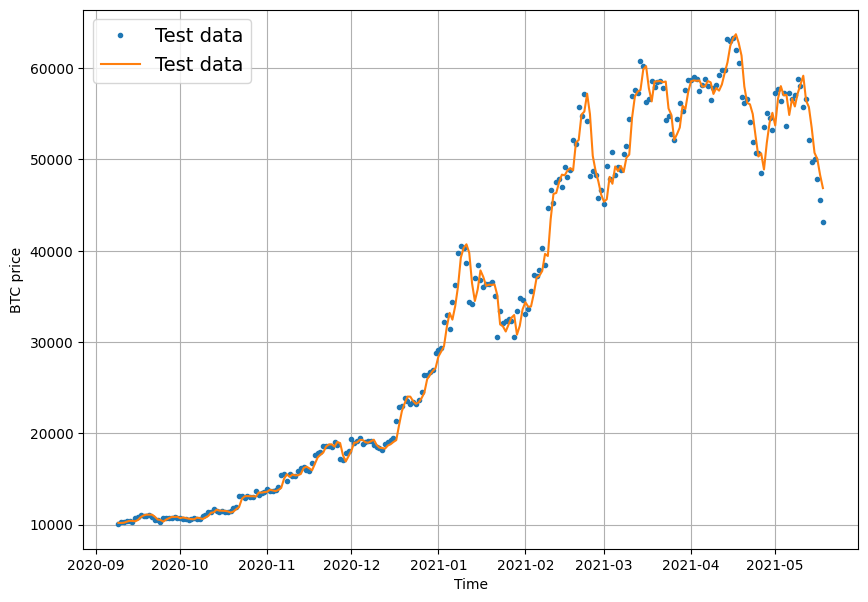

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = 'Test data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 label = 'Test data',
                 format = '-')

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
 train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                 labels = full_labels)

 len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation = 'linear')
], name = 'model_3_dense')

model_3.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)


model_3.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 657.7276


657.7276000976562

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 657.7276


657.7276000976562

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8626.826 , 8679.554 , 8689.342 , 8719.259 , 8772.192 , 8777.431 ,
        8678.901 ],
       [8678.777 , 8637.712 , 8585.137 , 8520.055 , 8774.027 , 8736.726 ,
        8573.1045],
       [8438.846 , 8584.563 , 8342.504 , 8306.621 , 8424.093 , 8410.399 ,
        8333.058 ],
       [8329.169 , 8468.677 , 8157.923 , 8254.583 , 8339.779 , 8285.468 ,
        8241.392 ],
       [8265.576 , 8284.5625, 8295.638 , 8353.56  , 8387.972 , 8415.433 ,
        8314.981 ]], dtype=float32)>

In [ ]:

# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=(test_labels),
                                 y_pred=model_3_preds)
model_3_results



{'mae': 657.72766,
 'mse': 1431880.2,
 'rmse': 685.8361,
 'mape': 2.9999843,
 'mase': 1.1479648}

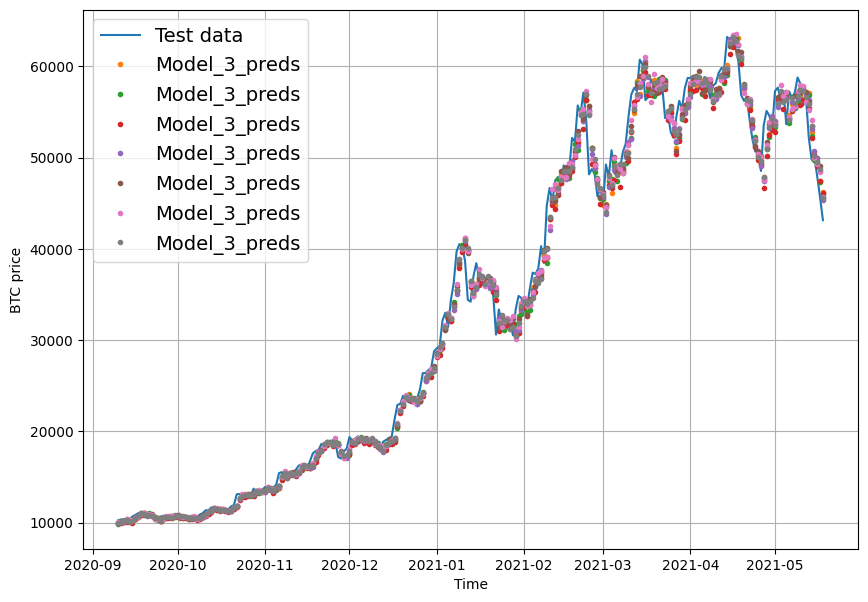

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], format = '-', start = offset, label = 'Test data')
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start = offset, label = 'Model_3_preds')

In [ ]:
len(test_windows), len(X_test)

(551, 558)

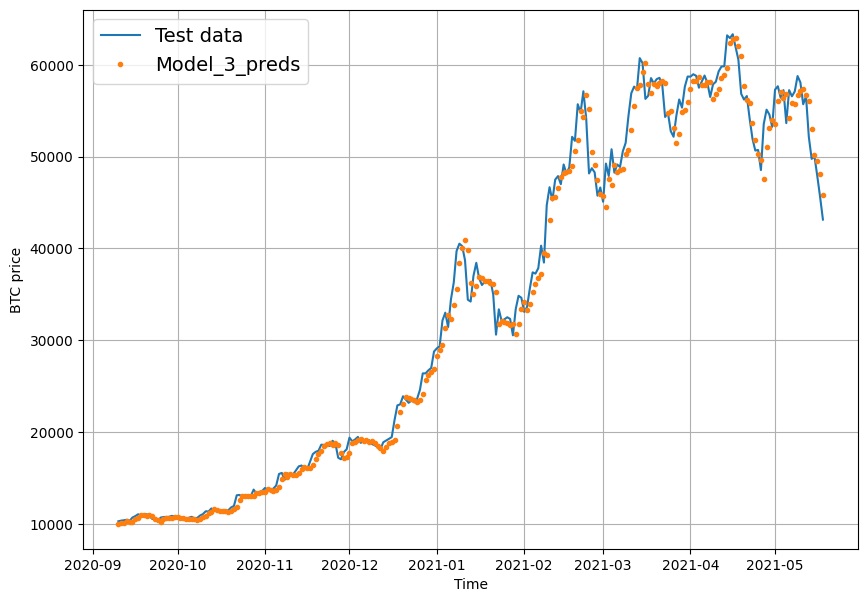

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], format = '-', start = offset, label = 'Test data')
plot_time_series(timesteps = X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis = 1), start = offset, label = 'Model_3_preds')

<Axes: >

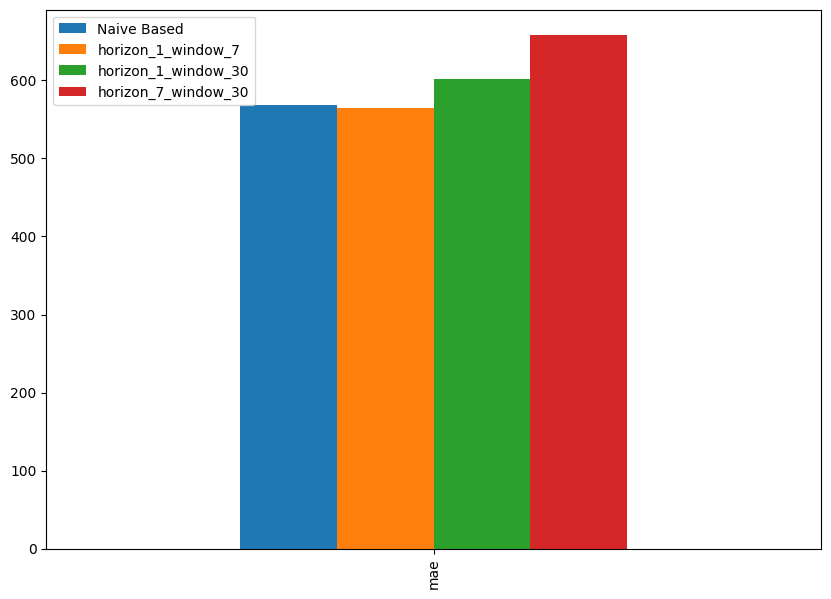

In [ ]:
pd.DataFrame({'Naive Based': naive_results['mae'],
             'horizon_1_window_7': model_1_results['mae'],
             'horizon_1_window_30': model_2_results['mae'],
             'horizon_7_window_30': model_3_results['mae']}, index = ['mae']).plot(figsize = (10, 7), kind = 'bar')

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows)

(2224, 556)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(128, kernel_size = 5, strides = 1, padding = 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_4_Conv1D')

model_4.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)


model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (test_windows, test_labels),
            verbose = 0,
            callbacks = [create_model_checkpoint(model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 623.5497


623.5496826171875

In [ ]:
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.9222


570.9222412109375

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8906.775 , 8795.1   , 9011.46  , 8810.512 , 8758.3545, 8751.889 ,
       8697.211 , 8541.317 , 8481.211 , 8527.61  ], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 570.92224,
 'mse': 1186434.8,
 'rmse': 1089.2358,
 'mape': 2.5545218,
 'mase': 1.0029522}

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(128, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, output, name = 'model_5_lstm')


model_5.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)

model_5.fit(
    train_windows,
    train_labels,
    epochs = 100,
    batch_size = 128,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_5.name)]
)

Epoch 1/100
18/18 [==============================] - 4s 114ms/step - loss: 2860.8494 - val_loss: 13522.4365
Epoch 2/100
18/18 [==============================] - 2s 101ms/step - loss: 1380.6066 - val_loss: 3197.9548
Epoch 3/100
18/18 [==============================] - 2s 99ms/step - loss: 312.7859 - val_loss: 1246.8678
Epoch 4/100
18/18 [==============================] - 2s 141ms/step - loss: 222.0803 - val_loss: 1129.7837
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 208.0139 - val_loss: 1211.6842
Epoch 6/100
18/18 [==============================] - 2s 113ms/step - loss: 201.7650 - val_loss: 1121.6857
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 200.2857 - val_loss: 1124.1541
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 197.9371 - val_loss: 1129.4683
Epoch 9/100
18/18 [==============================] - 2s 100ms/step - loss: 196.0853 - val_loss: 1117.7448
Epoch 10/100
18/18 [=============================

In [ ]:
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 588.7235


588.7235107421875

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8933.456, 8801.256, 8933.129, 8782.347, 8777.859], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 588.72345,
 'mse': 1232776.9,
 'rmse': 1110.3048,
 'mape': 2.6598485,
 'mase': 1.034224}

In [ ]:
#Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

In [ ]:
bitcoin_prices_block

,Prices,block_reward
Date,,
2013-10-01,123.654990,None
2013-10-02,125.455000,None
2013-10-03,108.584830,None
2013-10-04,118.674660,None
2013-10-05,121.338660,None
...,...,...
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None


In [ ]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block

,Prices,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


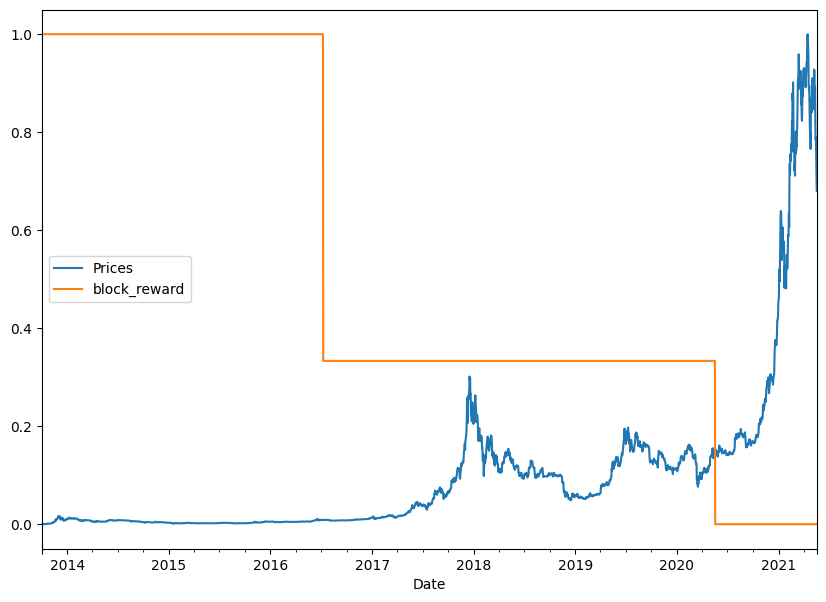

In [ ]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Prices', 'block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10, 7));

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Prices+{i+1}"] = bitcoin_prices_windowed["Prices"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Prices,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
bitcoin_prices_windowed

,Prices,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = bitcoin_prices_windowed.dropna().drop('Prices', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Prices'].astype(np.float32)
X.head()

,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Prices, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'model_6_dense_multivariate')


model_6.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)


model_6.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 128,
    validation_data = (X_test, y_test),
    callbacks = [create_model_checkpoint(model_6.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 22s - loss: 2960.4241

18/18 [==============================] - 2s 35ms/step - loss: 1130.6979 - val_loss: 2827.2131
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 325.1316

18/18 [==============================] - 0s 29ms/step - loss: 321.6443 - val_loss: 1279.1327
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 225.6495

18/18 [==============================] - 0s 28ms/step - loss: 222.0973 - val_loss: 1158.7833
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 260.6205

18/18 [==============================] - 0s 27ms/step - loss: 203.7921 - val_loss: 1091.3031
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 203.9783

18/18 [==============================] - 0s 28ms/step - loss: 196.1048 - val_loss: 1075.9615
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0504

18/18 [==============================] - 0s 28ms/step - loss: 194.4645 - val_loss: 1067.5377
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 186.6403 - val_loss: 1079.5601
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 164.0408

18/18 [==============================] - 0s 28ms/step - loss: 179.4270 - val_loss: 984.7073
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 176.6330 - val_loss: 984.8107
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 187.5763

18/18 [==============================] - 0s 28ms/step - loss: 170.2479 - val_loss: 929.9562
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 161.3553

18/18 [==============================] - 0s 28ms/step - loss: 161.3553 - val_loss: 883.9771
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 154.6291 - val_loss: 896.5115
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 153.0865 - val_loss: 929.3821
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 164.9161

18/18 [==============================] - 0s 28ms/step - loss: 147.7766 - val_loss: 871.0502
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 149.1138

18/18 [==============================] - 1s 46ms/step - loss: 146.3302 - val_loss: 797.9241
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 138.0200 - val_loss: 807.7300
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 135.8769 - val_loss: 860.6614
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 157.1313

18/18 [==============================] - 0s 28ms/step - loss: 136.9785 - val_loss: 777.6494
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 84.0862

18/18 [==============================] - 0s 29ms/step - loss: 129.1908 - val_loss: 718.6691
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 135.8288

18/18 [==============================] - 0s 28ms/step - loss: 126.4044 - val_loss: 691.9808
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 153.2996

18/18 [==============================] - 0s 28ms/step - loss: 129.2983 - val_loss: 675.9613
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 125.0440 - val_loss: 693.1431
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 129.8710 - val_loss: 691.7543
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7869

18/18 [==============================] - 0s 28ms/step - loss: 124.6014 - val_loss: 650.8979
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5403

18/18 [==============================] - 0s 28ms/step - loss: 120.4461 - val_loss: 643.2458
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2916

18/18 [==============================] - 0s 28ms/step - loss: 119.5087 - val_loss: 642.9972
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 161.6844

18/18 [==============================] - 1s 39ms/step - loss: 121.5440 - val_loss: 630.2711
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0138

18/18 [==============================] - 1s 41ms/step - loss: 116.8322 - val_loss: 625.3382
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 115.8174 - val_loss: 635.1633
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 121.8547 - val_loss: 627.1982
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 114.0023

18/18 [==============================] - 1s 39ms/step - loss: 114.5069 - val_loss: 617.4193
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4566 - val_loss: 625.5771
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5213 - val_loss: 650.1208
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5935

18/18 [==============================] - 0s 27ms/step - loss: 114.9672 - val_loss: 606.9688
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0524 - val_loss: 607.3479
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 159.7795

18/18 [==============================] - 0s 28ms/step - loss: 116.6607 - val_loss: 599.5955
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 112.4222

18/18 [==============================] - 0s 28ms/step - loss: 112.4222 - val_loss: 595.7496
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2544 - val_loss: 642.1104
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 130.6104

18/18 [==============================] - 0s 28ms/step - loss: 112.4184 - val_loss: 594.5247
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.7763

18/18 [==============================] - 0s 27ms/step - loss: 111.0073 - val_loss: 593.2526
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 101.0427

18/18 [==============================] - 0s 28ms/step - loss: 111.2614 - val_loss: 589.4889
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.0817 - val_loss: 642.8532
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7899 - val_loss: 626.8884
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 70.5285

18/18 [==============================] - 0s 28ms/step - loss: 111.2045 - val_loss: 586.1587
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 81.6189

18/18 [==============================] - 0s 28ms/step - loss: 109.8666 - val_loss: 580.8682
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8420 - val_loss: 596.1223
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5227 - val_loss: 586.8579
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6492 - val_loss: 671.8502
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 126.7551 - val_loss: 607.8352
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5343 - val_loss: 615.9459
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 89.7322

18/18 [==============================] - 0s 28ms/step - loss: 110.4904 - val_loss: 574.9202
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5234 - val_loss: 592.6336
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1155 - val_loss: 588.8595
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4036 - val_loss: 575.9503
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7371 - val_loss: 656.2333
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3512 - val_loss: 966.5529
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 149.3462 - val_loss: 767.8362
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8556 - val_loss: 642.3221
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 78.4076

18/18 [==============================] - 1s 47ms/step - loss: 112.3097 - val_loss: 572.9145
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3338 - val_loss: 576.2340
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6934 - val_loss: 581.8004
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8792 - val_loss: 589.9880
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8671 - val_loss: 607.7112
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8065 - val_loss: 598.0209
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9854

18/18 [==============================] - 0s 28ms/step - loss: 109.7725 - val_loss: 568.3602
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 117.5021

18/18 [==============================] - 0s 27ms/step - loss: 107.1975 - val_loss: 567.6896
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3005 - val_loss: 631.0955
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4297 - val_loss: 704.7147
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 127.9550 - val_loss: 601.9284
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 138.6390 - val_loss: 581.7655
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5339 - val_loss: 605.9656
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1203 - val_loss: 598.6132
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5552 - val_loss: 607.3632
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1044

18/18 [==============================] - 0s 27ms/step - loss: 109.0253 - val_loss: 567.3140
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4092 - val_loss: 578.5650
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 76.2064

18/18 [==============================] - 0s 26ms/step - loss: 109.6365 - val_loss: 566.0950
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.6884

18/18 [==============================] - 1s 33ms/step - loss: 107.5613 - val_loss: 565.4424
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7531 - val_loss: 586.1987
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0240 - val_loss: 588.9727
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6979 - val_loss: 575.8267
Epoch 81/100
16/18 [=========================>....] - ETA: 0s - loss: 106.6153

18/18 [==============================] - 1s 40ms/step - loss: 106.4841 - val_loss: 565.1906
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7719 - val_loss: 570.1600
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3543 - val_loss: 714.6456
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.7454 - val_loss: 575.5371
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 108.5671 - val_loss: 569.6693
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 106.3287 - val_loss: 575.7574
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 106.4238 - val_loss: 596.0928
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8571 - val_loss: 587.8818
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7217 - val_loss: 572.9587
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 10

In [ ]:
model_6 = tf.keras.models.load_model('/content/model_experiments/model_6_dense_multivariate')

model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.1907


565.190673828125

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8866.293, 8779.66 , 9018.117, 8797.013, 8744.365, 8723.749,
       8688.185, 8532.676, 8454.477, 8525.486], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)

model_6_results

{'mae': 565.19073,
 'mse': 1162587.8,
 'rmse': 1078.2336,
 'mape': 2.5281823,
 'mase': 0.99288356}

In [ ]:
model_1_results

{'mae': 564.6184,
 'mse': 1157359.0,
 'rmse': 1075.8063,
 'mape': 2.5261388,
 'mase': 0.99187815}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
#Build multi input model

In [ ]:
X_train

,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2019-11-05,12.5,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609,9458.223633
2019-11-06,12.5,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609
2019-11-07,12.5,9326.599609,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117


In [ ]:
block_reward_inputs = layers.Input(shape = [1, ], name = 'reward_blocks_inputs')
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(block_reward_inputs)
x = layers.Dense(128, activation = 'relu')(x)
block_reward_outputs = layers.Dense(16)(x)

block_reward_model = tf.keras.models.Model(block_reward_inputs, block_reward_outputs)



price_inputs = layers.Input(shape = [WINDOW_SIZE], name = 'price_inputs')
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(price_inputs)
x = layers.Dense(128, activation = 'relu')(x)
price_outputs = layers.Dense(16)(x)


price_model = tf.keras.models.Model(price_inputs, price_outputs)



price_block_reward_model = layers.Concatenate(name = 'price_block_hybrid_input')([block_reward_model.output,
                                                                                  price_model.output])


output_layer = layers.Dense(HORIZON)(price_block_reward_model)

In [ ]:
model_7 = tf.keras.models.Model(inputs = [block_reward_inputs,
                                          price_inputs],
                                outputs = output_layer,
                                name = 'model_7_hybrid')

model_7.summary()

Model: "model_7_hybrid"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 reward_blocks_inputs (InputLay  [(None, 1)]         0           []                               
 er)                                                                                              
                                                                                                  
 price_inputs (InputLayer)      [(None, 7)]          0           []                               
                                                                                                  
 lambda_2 (Lambda)              (None, 1, 1)         0           ['reward_blocks_inputs[0][0]']   
                                                                                                  
 lambda_3 (Lambda)              (None, 1, 7)         0           ['price_inputs[0][0]

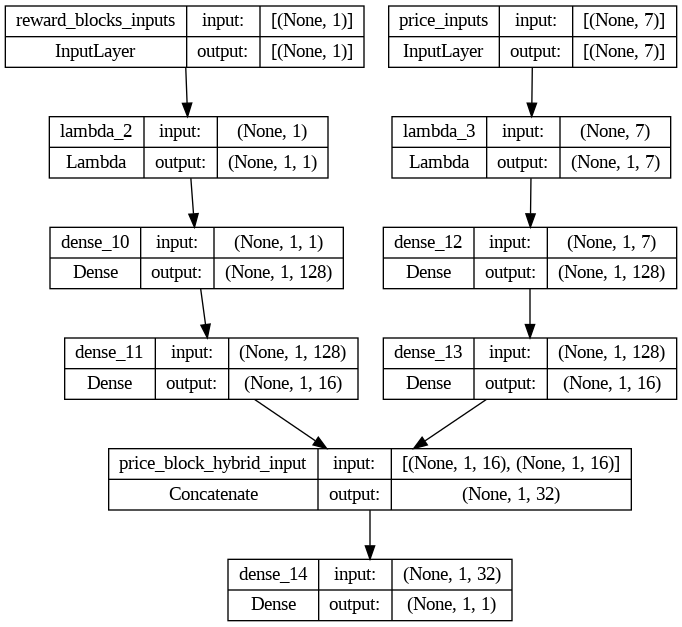

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, show_shapes = True)

In [ ]:
model_7.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_7.fit(x = [X_train['block_reward'], X_train.drop('block_reward', axis = 1)],
            y = y_train,
            epochs = 100,
            batch_size = 128,
            validation_data = ([X_test['block_reward'], X_test.drop('block_reward', axis = 1)], y_test),
            callbacks = [create_model_checkpoint(model_7.name)])

Epoch 1/100
18/18 [==============================] - 4s 101ms/step - loss: 1733.8479 - val_loss: 4336.6890
Epoch 2/100
18/18 [==============================] - 1s 84ms/step - loss: 335.9648 - val_loss: 1643.3574
Epoch 3/100
18/18 [==============================] - 2s 108ms/step - loss: 210.2952 - val_loss: 1011.5173
Epoch 4/100
18/18 [==============================] - 2s 103ms/step - loss: 170.5789 - val_loss: 960.1812
Epoch 5/100
18/18 [==============================] - 2s 113ms/step - loss: 160.3377 - val_loss: 871.3854
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 155.6942 - val_loss: 931.4769
Epoch 7/100
18/18 [==============================] - 1s 87ms/step - loss: 150.2998 - val_loss: 843.4680
Epoch 8/100
18/18 [==============================] - 1s 84ms/step - loss: 142.8552 - val_loss: 780.3282
Epoch 9/100
18/18 [==============================] - 1s 85ms/step - loss: 147.8609 - val_loss: 763.4083
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
model_7 = tf.keras.models.load_model("/content/model_experiments/model_7_hybrid")

model_7.evaluate([X_test['block_reward'], X_test.drop('block_reward', axis = 1)], y_test)

18/18 [==============================] - 0s 3ms/step - loss: 562.4232


562.4232177734375

In [ ]:
model_6_results

{'mae': 565.19073,
 'mse': 1162587.8,
 'rmse': 1078.2336,
 'mape': 2.5281823,
 'mase': 0.99288356}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'theta')


  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

In [ ]:
tf.random.set_seed(42)

dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast:  {tf.squeeze(backcast).numpy()}")
print(f"Forecast:  {tf.squeeze(forecast).numpy()}")

Backcast:  [-0.14094403  0.07717708 -0.4239685   0.1077628  -0.2544655  -0.01932777
  0.25692907]
Forecast:  -0.2777445614337921


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices[:10]

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats['Prices'].shift(periods = i + 1)
bitcoin_prices_nbeats

,Prices,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Prices", axis=1)
y = bitcoin_prices_nbeats.dropna()["Prices"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
y_test[556:]

Series([], Name: Prices, dtype: float64)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)


test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON


INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)


subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted.numpy(), added.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

In [ ]:
%%time


tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')


stack_input = tf.keras.layers.Input(shape = (INPUT_SIZE), name = 'stack_input')


residuals, forecast = nbeats_block_layer(stack_input)


for i, _ in enumerate(range(N_STACKS - 1)):
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals)


  residuals = layers.subtract([residuals, backcast], name = f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name = f'add_{i}')


model_7 = tf.keras.models.Model(inputs = stack_input,
                                outputs = forecast,
                                name = 'model_7_NBEAST')


model_7.compile(
    loss = 'MAE',
    optimizer = tf.keras.optimizers.Adam()
)



model_7_history = model_7.fit(train_dataset,
                                  epochs = N_EPOCHS,
                                  validation_data = test_dataset,
                                  verbose = 0,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                                                patience = 200,
                                                                                restore_best_weights = True),
                                               tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                                    patience = 100,
                                                                                    verbose = 1)])



Epoch 939: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1084: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1184: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 28s, sys: 5.4 s, total: 4min 33s
Wall time: 5min 14s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 572.6621


572.662109375

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8853.589, 8784.789, 9033.186, 8776.461, 8733.576, 8730.176,
       8674.011, 8511.657, 8462.06 , 8518.942], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results


{'mae': 572.6621,
 'mse': 1180251.1,
 'rmse': 1086.3936,
 'mape': 2.574962,
 'mase': 1.0060087}

In [ ]:
model_1_results

{'mae': 564.6184,
 'mse': 1157359.0,
 'rmse': 1075.8063,
 'mape': 2.5261388,
 'mase': 0.99187815}

In [ ]:
y_test.shape, model_7_preds.shape

((556,), TensorShape([556]))

In [ ]:
print()

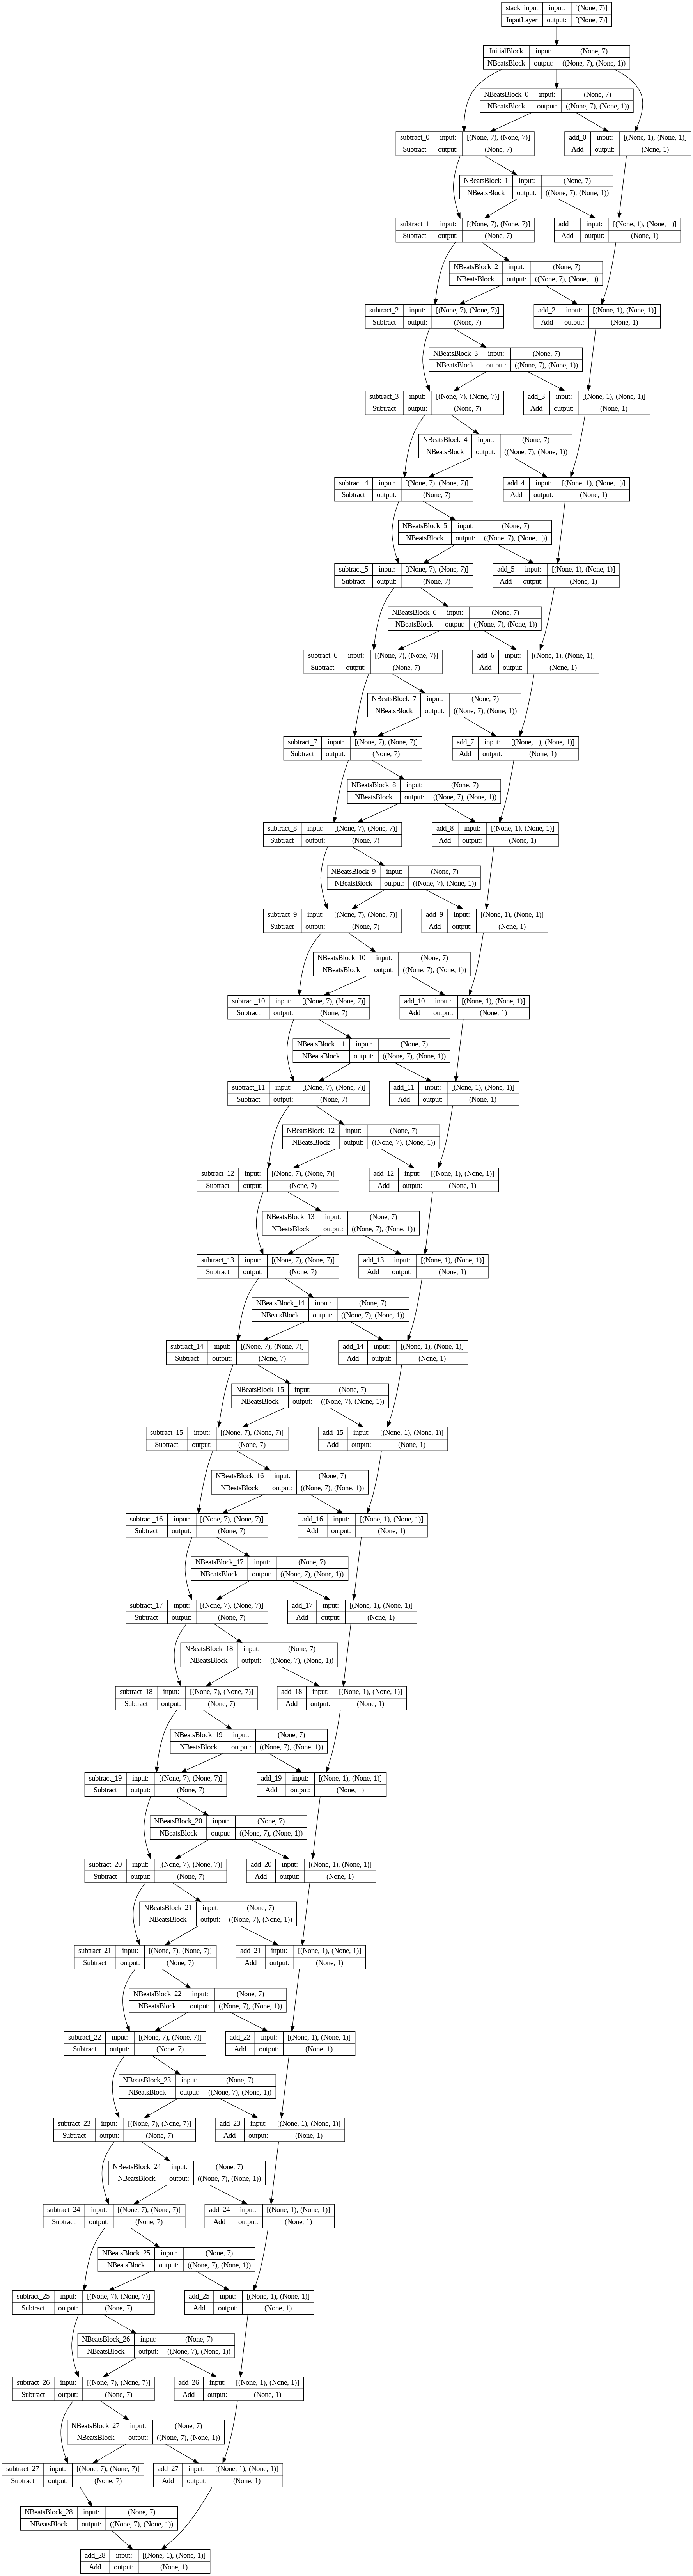

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, show_shapes = True)

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ['mae', 'mse', 'mape']):

  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model_number {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = "he_normal", activation = 'relu'),
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(HORIZON)
      ])


      model.compile(
          loss = loss_function,
          optimizer = tf.keras.optimizers.Adam(),
          metrics = ['mae', 'mse']
      )


      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                  patience = 100,
                                                                  verbose = 1)])

      ensemble_models.append(model)

  return ensemble_models



In [ ]:
%%time

ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model_number 0

Epoch 315: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 453: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 553: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model_number 0

Epoch 673: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 773: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model_number 0

Epoch 214: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 671: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 771: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model_number 1

Epoch 173: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing mode

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time

ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step
CPU times: user 646 ms, sys: 25.2 ms, total: 671 ms
Wall time: 791 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8719.466,  8717.169,  9084.827, ..., 50249.77 , 48877.43 ,
        45990.04 ],
       [ 8769.576,  8752.865,  9017.701, ..., 49716.42 , 48356.094,
        46512.   ],
       [ 8787.149,  8759.267,  9066.76 , ..., 50105.043, 48362.824,
        46115.09 ],
       ...,
       [ 8803.452,  8751.955,  9040.55 , ..., 50384.39 , 48380.832,
        46000.812],
       [ 8762.383,  8764.726,  9101.704, ..., 50277.89 , 48374.86 ,
        46278.23 ],
       [ 8810.467,  8786.595,  9051.879, ..., 49870.47 , 48741.93 ,
        46887.402]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_preds)

ensemble_results

{'mae': 578.98364,
 'mse': 1175471.2,
 'rmse': 1084.1593,
 'mape': 2.631419,
 'mase': 1.017114}

In [ ]:
model_1_results

{'mae': 564.6184,
 'mse': 1157359.0,
 'rmse': 1075.8063,
 'mape': 2.5261388,
 'mase': 0.99187815}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8787.015, 8777.918, 9054.591, 8716.545, 8750.672, 8721.171,
       8653.625, 8487.431, 8451.195, 8516.408], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median[:10]

array([8787.149, 8786.595, 9051.879, 8707.792, 8747.622, 8726.651,
       8657.995, 8485.546, 8451.679, 8512.978], dtype=float32)

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_mean)

ensemble_results

{'mae': 567.92267,
 'mse': 1143090.0,
 'rmse': 1069.1539,
 'mape': 2.5676255,
 'mase': 0.9976828}

In [ ]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)

ensemble_results

{'mae': 569.58875,
 'mse': 1148258.1,
 'rmse': 1071.568,
 'mape': 2.5670958,
 'mase': 1.0006096}

In [ ]:
tf.math.reduce_std(ensemble_preds, axis = 0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 43.828907,  32.161514,  31.916523,  31.807837,  37.730972,
        23.842464,  28.373032,  38.20844 ,  22.916346,  17.411703,
        30.099482,  27.929758,  18.466347,  39.89031 ,  29.385006,
        33.741764,  24.274836,  36.53436 ,  28.10929 ,  31.078316,
        25.282341,  32.868126,  25.755087,  42.130978,  42.708397,
        24.769264,  29.493828,  16.55666 ,  20.626415,  20.30931 ,
        23.332993,  30.370575,  26.306892,  22.635302,  15.090023,
        17.511604,  20.040352,  15.136941,  25.898228,  32.264545,
        54.325626,  87.09303 ,  42.615402,  58.558624,  70.096794,
        53.37382 ,  20.58929 ,  16.978882,  17.31569 ,  16.89571 ,
        14.513991,  14.40714 ,  22.066551,  23.832811,  15.847866,
        25.673355,  26.985485,  29.493837,  23.263445,  30.843027,
        43.792973,  41.934097,  42.173935,  46.751534,  41.630535,
        25.248205,  30.266285,  38.595886,  42.538704,  36.920254,
        48.180

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis = 0)

  interval = std * 1.96

  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper


In [ ]:
lower, upper = get_upper_lower(ensemble_preds)

lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8701.11  ,  8714.882 ,  8992.034 ,  8654.201 ,  8676.719 ,
         8674.439 ,  8598.014 ,  8412.542 ,  8406.279 ,  8482.281 ,
         8140.717 ,  8052.8315,  8018.4365,  7549.669 ,  7248.7324,
         7250.9316,  7026.8325,  7133.102 ,  7058.309 ,  7456.7163,
         7349.8125,  7682.1772,  7525.2847,  7302.527 ,  7240.5415,
         7255.7627,  7145.04  ,  7348.485 ,  7471.1714,  7505.712 ,
         7504.576 ,  7269.696 ,  7170.494 ,  7133.0244,  7150.1343,
         7189.928 ,  7036.9146,  7064.4873,  6820.699 ,  6526.7466,
         7275.7656,  7015.4497,  7089.2437,  7144.431 ,  7122.4937,
         7082.348 ,  7172.7173,  7175.239 ,  7140.738 ,  7176.2485,
         7279.9126,  7362.862 ,  7204.26  ,  7117.6753,  7124.7554,
         6895.8735,  7218.4146,  7284.0923,  7319.455 ,  7649.933 ,
         7987.21  ,  8060.9497,  7776.3535,  7987.73  ,  8022.7397,
         8122.606 ,  8049.2114,  8674.072 ,  8824.221 ,  8694.83  ,

In [ ]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

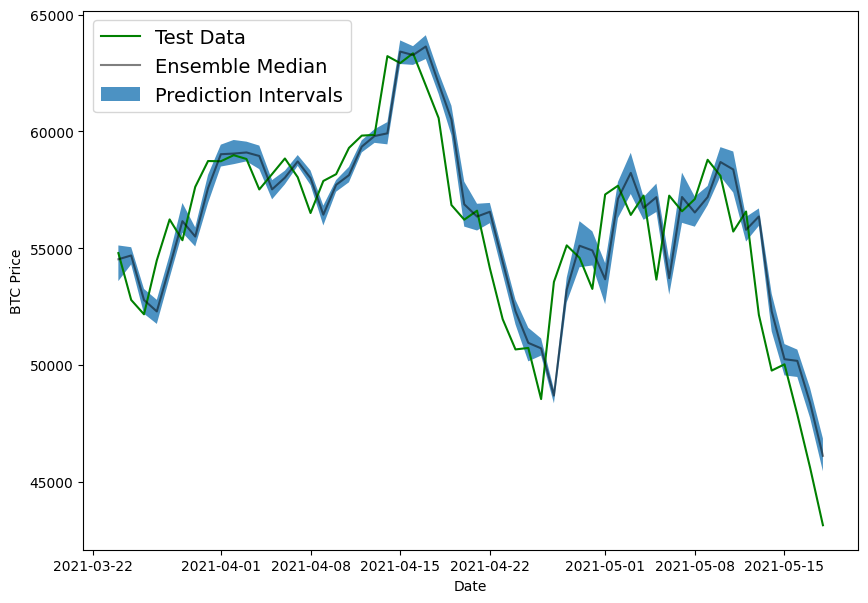

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)

offset = 500
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label = 'Test Data');
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label = 'Ensemble Median', alpha = 0.5)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label = 'Prediction Intervals',
                 alpha = 0.8);
plt.legend(loc = 'upper left', fontsize = 14);

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.tail()

,Prices,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(['Prices', 'block_reward'], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Prices'].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:10], y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = 'Model_9')


model_9.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam()
)

model_9_history = model_9.fit(
    dataset_all,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 5065.4795
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 2705.7595
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 617.8817
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 1448.2565
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1684.4966
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1032.4244
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 428.9150
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 741.0530
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 686.1707
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 394.9921
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 523.1342
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 515.5051
Epoch 13/100
3/3 [==============

In [ ]:
INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size = WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast


In [ ]:
future_forecast = make_future_forecast(y_all, model_9, INTO_FUTURE)

1/1 [==============================] - 0s 83ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54698.078125

1/1 [==============================] - 0s 27ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54698.078125  ] -> Prediction: 51017.484375

1/1 [==============================] - 0s 27ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54698.078125   51017.484375  ] -> Prediction: 49534.5078125

1/1 [==============================] - 0s 28ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54698.078125   51017.484375   49534.5078125 ] -> Prediction: 48345.8671875

1/1 [==============================] - 0s 27ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 54698.078125
 51017.484375   49534.5078125  48345.8671875 ] -> P

In [ ]:
future_forecast

[54698.08,
 51017.484,
 49534.508,
 48345.867,
 45977.13,
 45195.918,
 48819.164,
 53078.66,
 50146.72,
 48491.53,
 46595.42,
 45570.29,
 47448.92,
 50988.402]

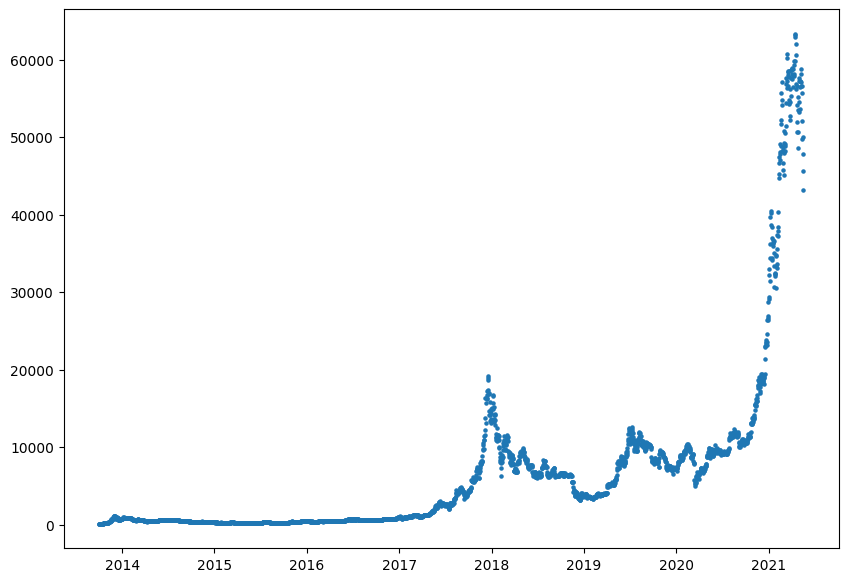

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(timesteps, prices,s = 5)
plt.show()

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, np.timedelta64(1, "D"), dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
last_timestep = bitcoin_prices.index[-1:][0]
next_timesteps = get_future_dates(last_timestep, into_future = INTO_FUTURE)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

In [ ]:
next_timesteps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54698.08 , 51017.484, 49534.508, 48345.867, 45977.13 ,
        45195.918, 48819.164, 53078.66 , 50146.72 , 48491.53 , 46595.42 ,
        45570.29 , 47448.92 , 50988.402], dtype=float32))

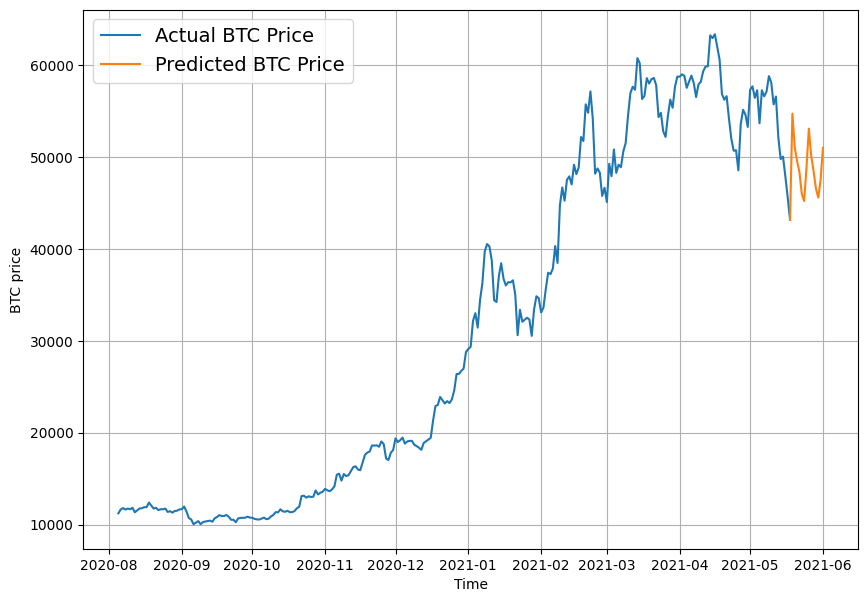

In [ ]:
plt.figure(figsize = (10, 7 ))
plot_time_series(bitcoin_prices.index, btc_price, start = 2500, format = '-', label = 'Actual BTC Price')
plot_time_series(next_timesteps, future_forecast, format = '-', label = 'Predicted BTC Price')

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

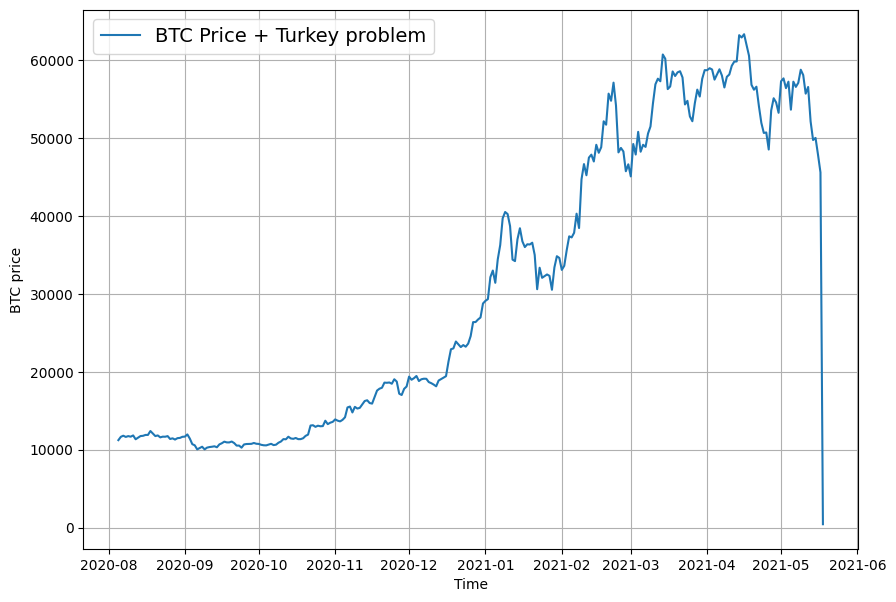

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(btc_timesteps_turkey,
                 btc_price_turkey,
                 format = '-',
                 label = 'BTC Price + Turkey problem',
                 start = 2500)

In [ ]:
WINDOW_SIZE = 1
HORIZON = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2780, 2780)

In [ ]:
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)


(2224, 556, 2224, 556)

In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'

In [ ]:
turkey_model.summary()

Model: "model_10_turkey_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
turkey_model.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam()
)

turkey_model.fit(
    X_train,
    y_train,
    epochs = 100,
    verbose = 0,
    batch_size = 128,
    validation_data = (X_test, y_test),
    callbacks = [create_model_checkpoint(turkey_model.name)]
)

In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 723.5067


723.5067138671875

In [ ]:
turkey_model = tf.keras.models.load_model('/content/model_experiments/model_10_turkey_model')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 647.1884


647.1883544921875

In [ ]:

# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8840.864, 8762.837, 9058.41 , 8772.001, 8722.366, 8765.296,
       8675.332, 8498.693, 8465.32 , 8530.306], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results


{'mae': 17120.174,
 'mse': 613747700.0,
 'rmse': 23696.094,
 'mape': 121.234505,
 'mase': 26.493526}

In [ ]:

model_1_results

{'mae': 564.6184,
 'mse': 1157359.0,
 'rmse': 1075.8063,
 'mape': 2.5261388,
 'mase': 0.99187815}

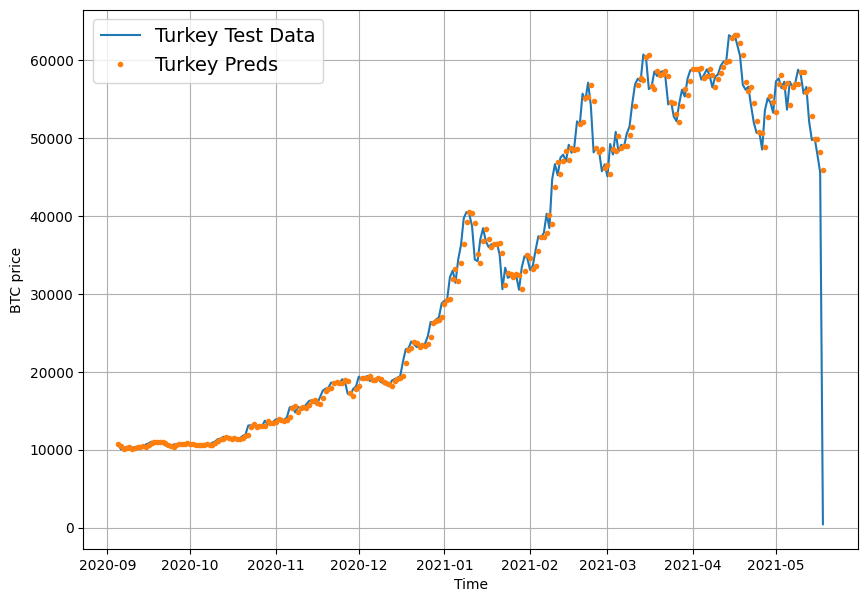

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);


In [ ]:

# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,564.618408,1.157359e+06,1075.806274,2.526139,0.991878
model_2_dense_w30_h1,602.271301,1.254133e+06,1119.880615,2.739408,1.052776
model_3_dense_w30_h7,657.727661,1.431880e+06,685.836121,2.999984,1.147965
model_4_CONV1D,570.922241,1.186435e+06,1089.235840,2.554522,1.002952
model_5_LSTM,588.723450,1.232777e+06,1110.304810,2.659848,1.034224
model_6_multivariate,565.190735,1.162588e+06,1078.233643,2.528182,0.992884
model_8_NBEATs,572.662109,1.180251e+06,1086.393555,2.574962,1.006009
model_9_ensemble,569.588745,1.148258e+06,1071.567993,2.567096,1.000610
model_10_turkey,17120.173828,6.137477e+08,23696.093750,121.234505,26.493526


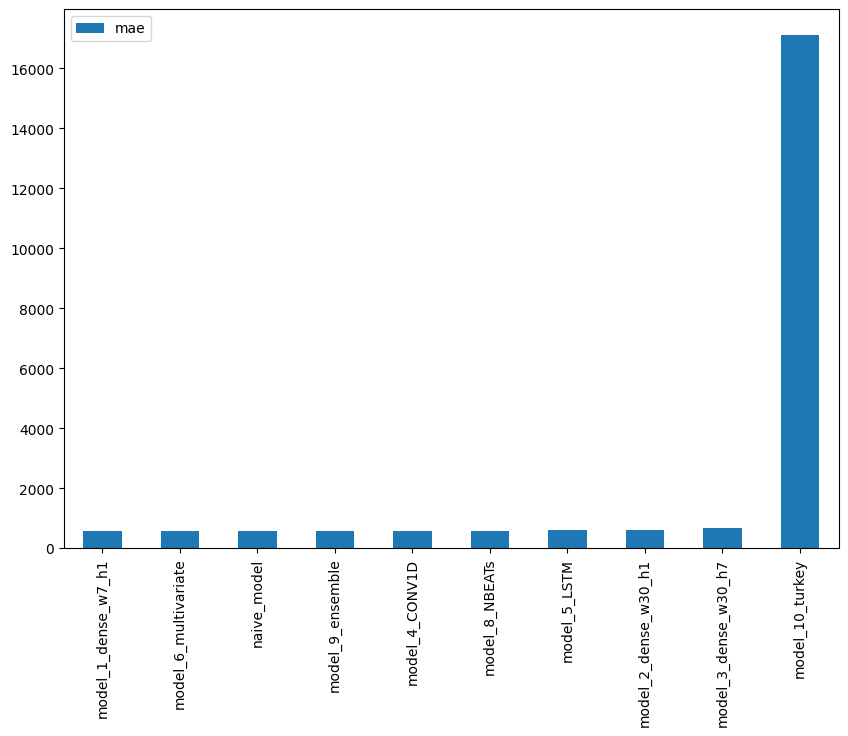

In [ ]:

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");